# Logistic Regression- algorithms

* (English)Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams.
* (Español)Supongamos que usted es el administrador de un departamento universitario y desea determinar la posibilidad de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede utilizar como conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, tiene los puntajes del solicitante en dos exámenes y la decisión de admisión. Su tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un solicitante basándose en los puntajes de esos dos exámenes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import scipy.optimize as op

In [2]:
 # load the data- cargamos los datos

data = pd.read_table('C://Users//Z420//Downloads//machine-learning-ex2//ex2/ex2data1.txt', sep = ',', header=None);

In [3]:
# Verify that the data load is Ok- comprobamos que los datos esten cargados correctamamente
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
## add ones column to dataframe - agregamos la columna de unos al dataframe
data[3] = np.ones(data.shape[0])
data.head()


,0,1,2,3
0,34.623660,78.024693,0,1.0
1,30.286711,43.894998,0,1.0
2,35.847409,72.902198,0,1.0
3,60.182599,86.308552,1,1.0
4,79.032736,75.344376,1,1.0


In [5]:
## we obtain the predict variables, idnex = 0, 1 and 3(ones) in X_train- obtenemos variables predictoras indice= 0 y 1 X_train
X =  data[[3,0,1]]
##we obtain the column of results, index=2 - obtenemos la columan de resultados indice=2
y = data[2]

In [19]:
##convert the Dataframe, to Numpy matrix- convertimos los dataframes a matrices
X_train = X.values
y_train = y.values
# we obtain the index with positive values =1-  obtenemos los indicies de datos positivos = 1
pos = y[y == 1].index.tolist()
#we obtain the index with positive values =0- obtenemos los indicies de datos negativos = 0
neg =  y[y == 0].index.tolist()


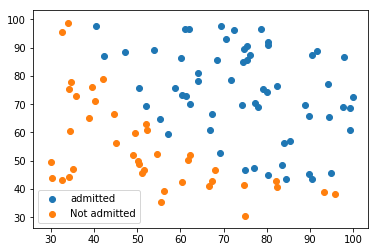

In [7]:
## graph the data- graficar los datos 
plt.scatter(X_train[pos][:,1],X_train[pos][:,2], label = 'admitted')
plt.scatter(X_train[neg][:,1],X_train[neg][:,2], label = 'Not admitted')
plt.legend()

In [8]:
# sigmoid fuction for values, vectors or matrix- sigmoide function funciona para valores solos o vectorizados
def sigmoid(z):
    return  1/(1+np.exp(-z))
test = np.matrix([[0, 2], [3, -44]])
sigmoid(test)


matrix([[5.00000000e-01, 8.80797078e-01],
        [9.52574127e-01, 7.78113224e-20]])

In [9]:
display(Math(r'Cost Function:'))
display(Math(r'J(\theta)=\frac{1}{m}\sum_{i = 1}^m [-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
def costFunction(tetha, X, y):
    m= len(y)
    J = 0
    grad = np.zeros(len(tetha))
    
    theta_T_x = X.dot(tetha)
    sigmoid_hyps = sigmoid(theta_T_x)
    for i in range(m):
        temp = (-y[i]* np.log(sigmoid_hyps[i])-(1-y[i])*np.log(1-sigmoid_hyps[i]))
        J += temp
        
    temp0 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,0]))
    temp1 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,1]))
    temp2 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,2]))
    grad[0] = (temp0/m)
    grad[1]= (temp1/m)
    grad[2]= (temp2/m)
        
    return  J/m 

In [11]:
display(Math(r'Gradient:'))
display(Math(r'\frac{\partial J(\theta)}{\partial \theta_j} =\frac{1}{m}\sum_{i = 1}^m (H_\theta(x^{(i)})-y^{(i)})x_j^{(i)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
def gradien(tetha, X, y):
    m= len(y)
    J = 0
    grad = np.zeros(len(tetha))
    
    theta_T_x = X.dot(tetha)
    sigmoid_hyps = sigmoid(theta_T_x)
    grad = np.zeros(len(tetha))
    temp0 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,0]))
    temp1 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,1]))
    temp2 = sum(np.multiply(np.subtract(sigmoid_hyps,y),X[:,2]))
    grad[0] = (temp0/m)
    grad[1]= (temp1/m)
    grad[2]= (temp2/m)
        
    return   grad.flatten()

#### Our optimization type: BFGS
#### Nuestro optimizador de tipo BFGS

In [14]:
initial_theta = x
Result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X_train, y_train),method = 'BFGS',jac = gradien);
optimal_theta = Result.x;

#### The theta optim:
#### Las constantes optimas son:

In [15]:
optimal_theta

array([-25.16133175,   0.2062317 ,   0.20147159])

In [16]:
def prediction(X, theta):
    values_p=  X.dot(theta)
    p = sigmoid(values_p)
    for i in range(len(X)):
        if (p[i]>= 0.5): 
            p[i] = 1
        else:
            p[i] = 0
    return p

#### Expected accuracy (approx): 89%
#### Precision Esperada: 89%

In [49]:
prediction_ = prediction(X, optimal_theta)
np.mean(prediction_ == y_train)

0.89

 ##### Podemos decir que si alguien tuvo calificaciones
  ##### We can say that if someone had qualifications
 * calif(1)= 45
 * calif(2) = 80
 ##### Probabilidad de pasar(probability of pass) = 55.8930185

In [51]:
t = np.matrix(' 1 45 85')
X_one_Student= np.matrix(' 1 45 80') 
hyp_student=  X_one_Student.dot(optimal_theta)
predictionStudent= sigmoid(hyp_student)
print(predictionStudent *100)

[[55.8930185]]
